In [7]:
import tempfile 

import requests
import zipfile
import io

import datetime
from datetime import datetime, timedelta
from datetime import datetime 

import os 

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

import geopandas 

from cartopy import crs as ccrs
import cartopy.feature as cfeature 

import pandas as pd
from datetime import datetime 

mpl.rcParams['axes.linewidth'] = 3


%config InlineBackend.figure_format='retina'

templocation = tempfile.mkdtemp()
print(templocation)

/tmp/tmp94nmdvfh


In [8]:
r = requests.get('https://www.spc.noaa.gov/products/outlook/day1otlk-shp.zip', stream = True)

z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall(templocation + '/')

cat_gdf_day_1 = geopandas.read_file(templocation + '/' + 'day1otlk_cat.shp')



r = requests.get('https://www.spc.noaa.gov/products/outlook/day2otlk-shp.zip', stream = True)

z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall(templocation + '/')

cat_gdf_day_2 = geopandas.read_file(templocation + '/' + 'day2otlk_cat.shp')



r = requests.get('https://www.spc.noaa.gov/products/outlook/day3otlk-shp.zip', stream = True)

z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall(templocation + '/')

cat_gdf_day_3 = geopandas.read_file(templocation + '/' + 'day3otlk_cat.shp')


print(os.listdir(templocation))

['day1otlk_wind.prj', 'day2otlk.info', 'day2otlk_cat.prj', 'day1otlk_wind.shp', 'day1otlk_torn.prj', 'day1otlk_hail.prj', 'day1otlk_sigtorn.dbf', 'day2otlk_sigprob.prj', 'day1otlk_sighail.shp', 'day3otlk_cat.prj', 'day1otlk_sigtorn.shp', 'day3otlk_sigprob.shx', 'day2otlk_prob.shp', 'day2otlk_sigprob.shp', 'day2otlk_sigprob.shx', 'day1otlk_sigwind.prj', 'day2otlk_prob.prj', 'day2otlk_cat.shp', 'day3otlk_prob.prj', 'day3otlk_sigprob.dbf', 'day1otlk_hail.shp', 'day1otlk_torn.shp', 'day2otlk_prob.dbf', 'day2otlk_prob.shx', 'day3otlk_prob.shp', 'day1otlk_sighail.shx', 'day1otlk_torn.shx', 'day3otlk_cat.dbf', 'day1otlk_sigtorn.prj', 'day1otlk_cat.dbf', 'day3otlk_sigprob.shp', 'day2otlk_cat.shx', 'day1otlk_cat.shx', 'day1otlk_cat.shp', 'day1otlk_cat.prj', 'day1otlk_hail.shx', 'day3otlk_prob.dbf', 'day1otlk_sigwind.shp', 'day1otlk_sigwind.dbf', 'day1otlk.info', 'day3otlk_prob.shx', 'day1otlk_torn.dbf', 'day1otlk_wind.dbf', 'day1otlk_sighail.prj', 'day1otlk_hail.dbf', 'day3otlk_sigprob.prj', 'd

In [9]:
cat_plot_colors = {2: 'palegreen', 
                   3: 'green', 
                   4: 'yellow', 
                   5: 'brown',
                   6: 'red', 
                   7: 'magenta'}

In [10]:
time_valid = pd.to_datetime(cat_gdf_day_1['VALID'][0], format = '%Y%m%d%H%M')

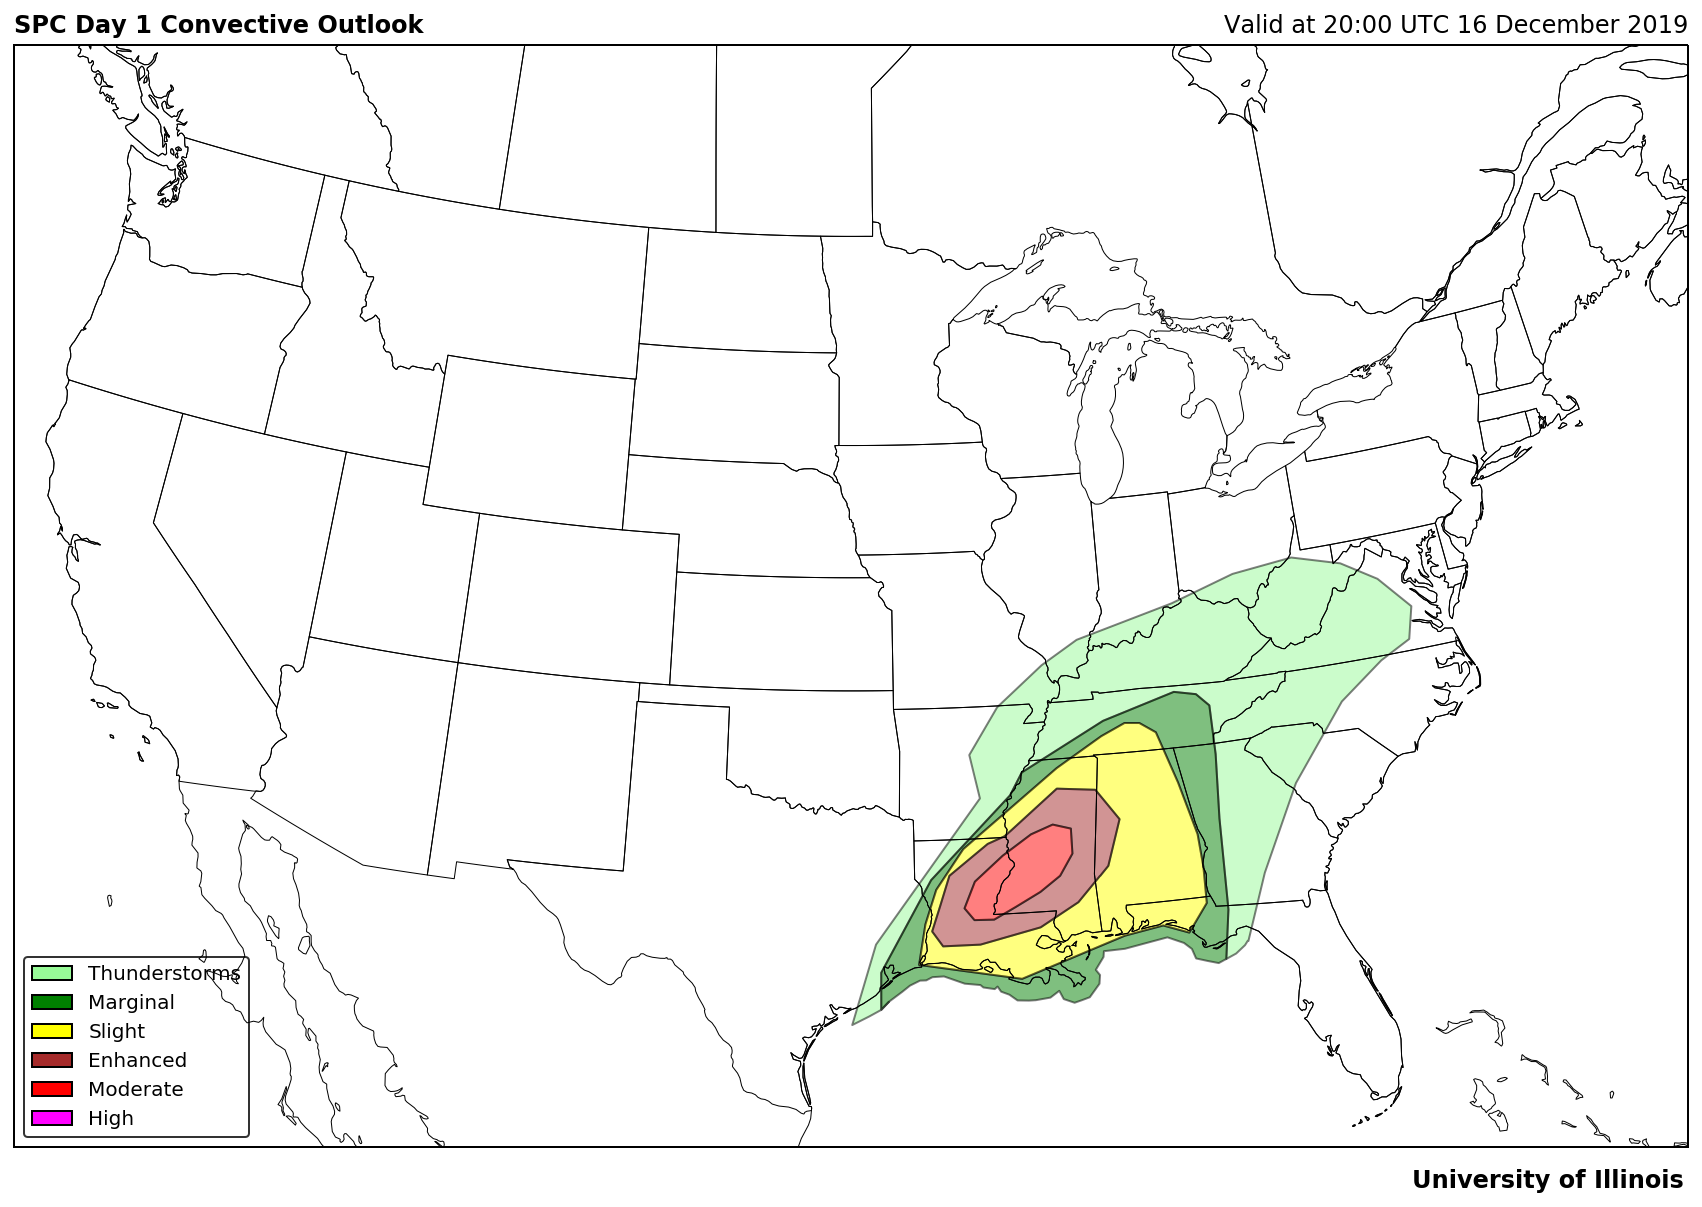

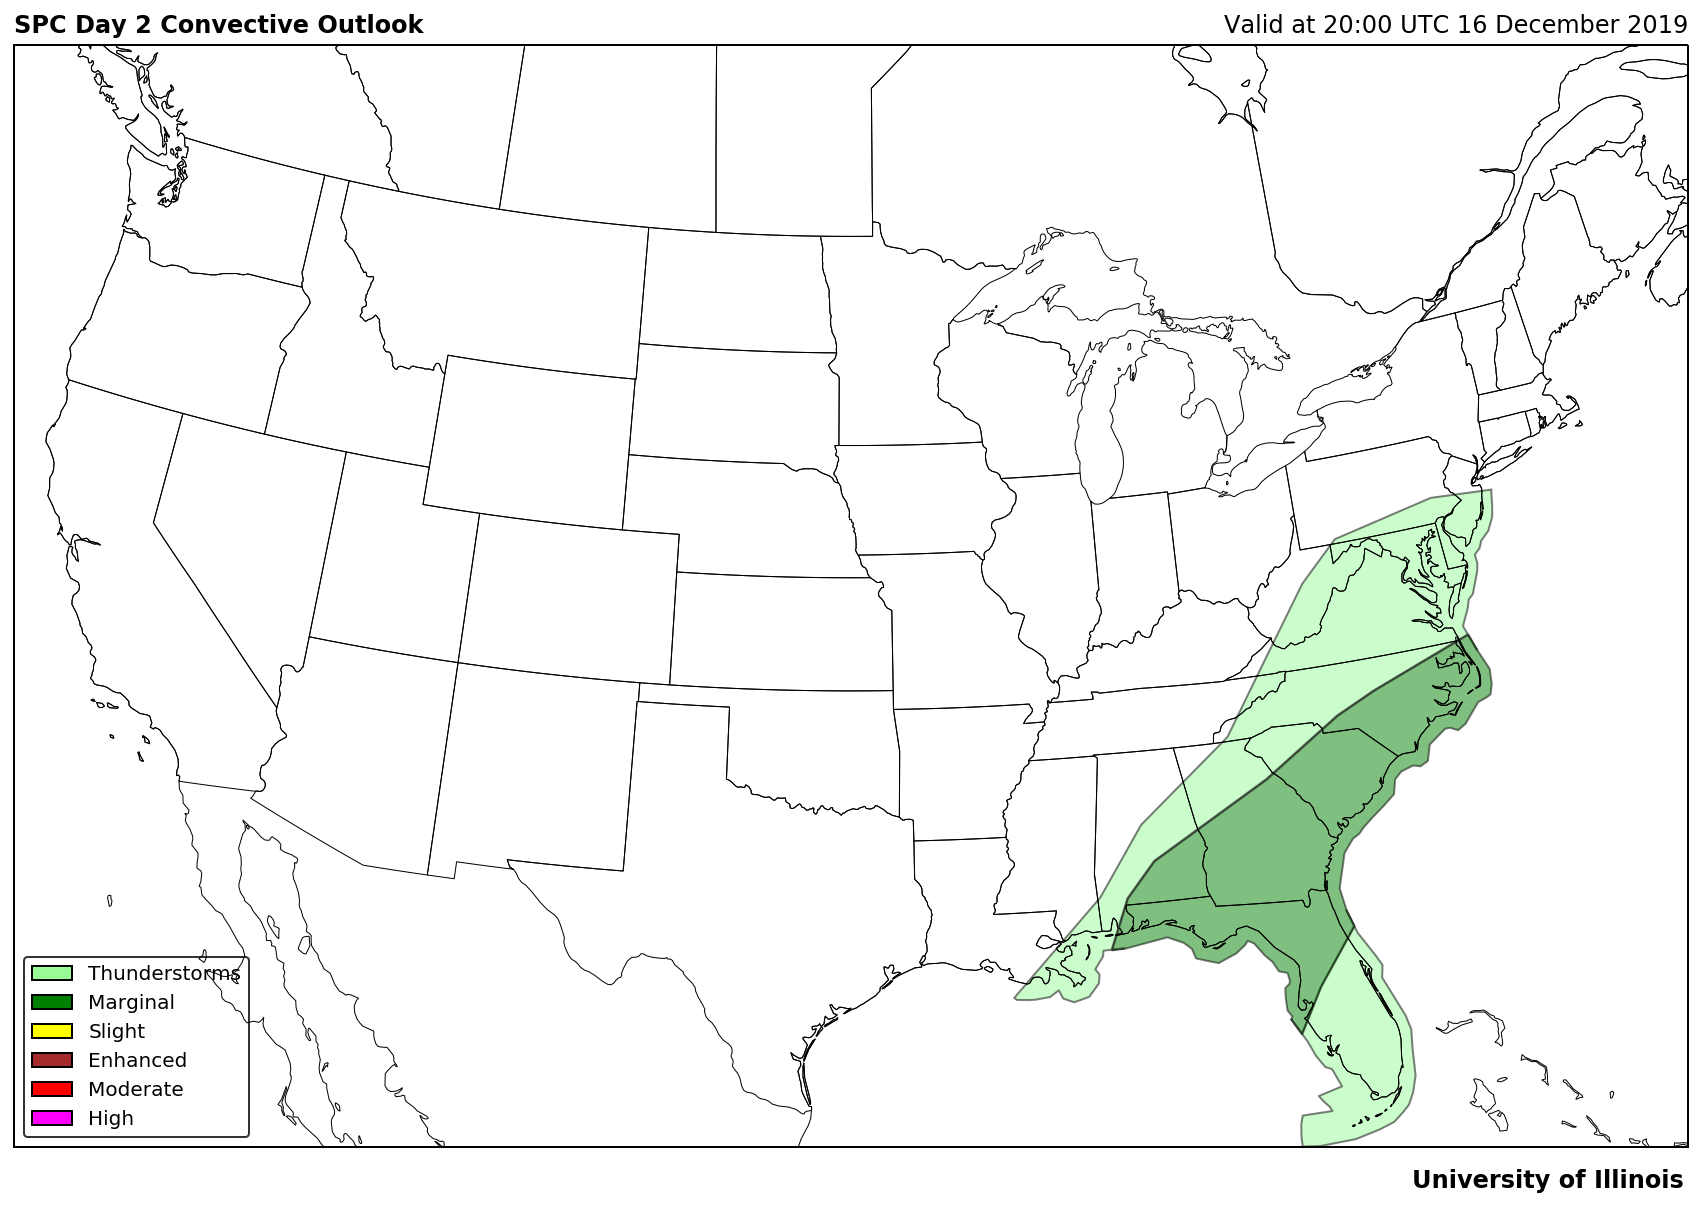

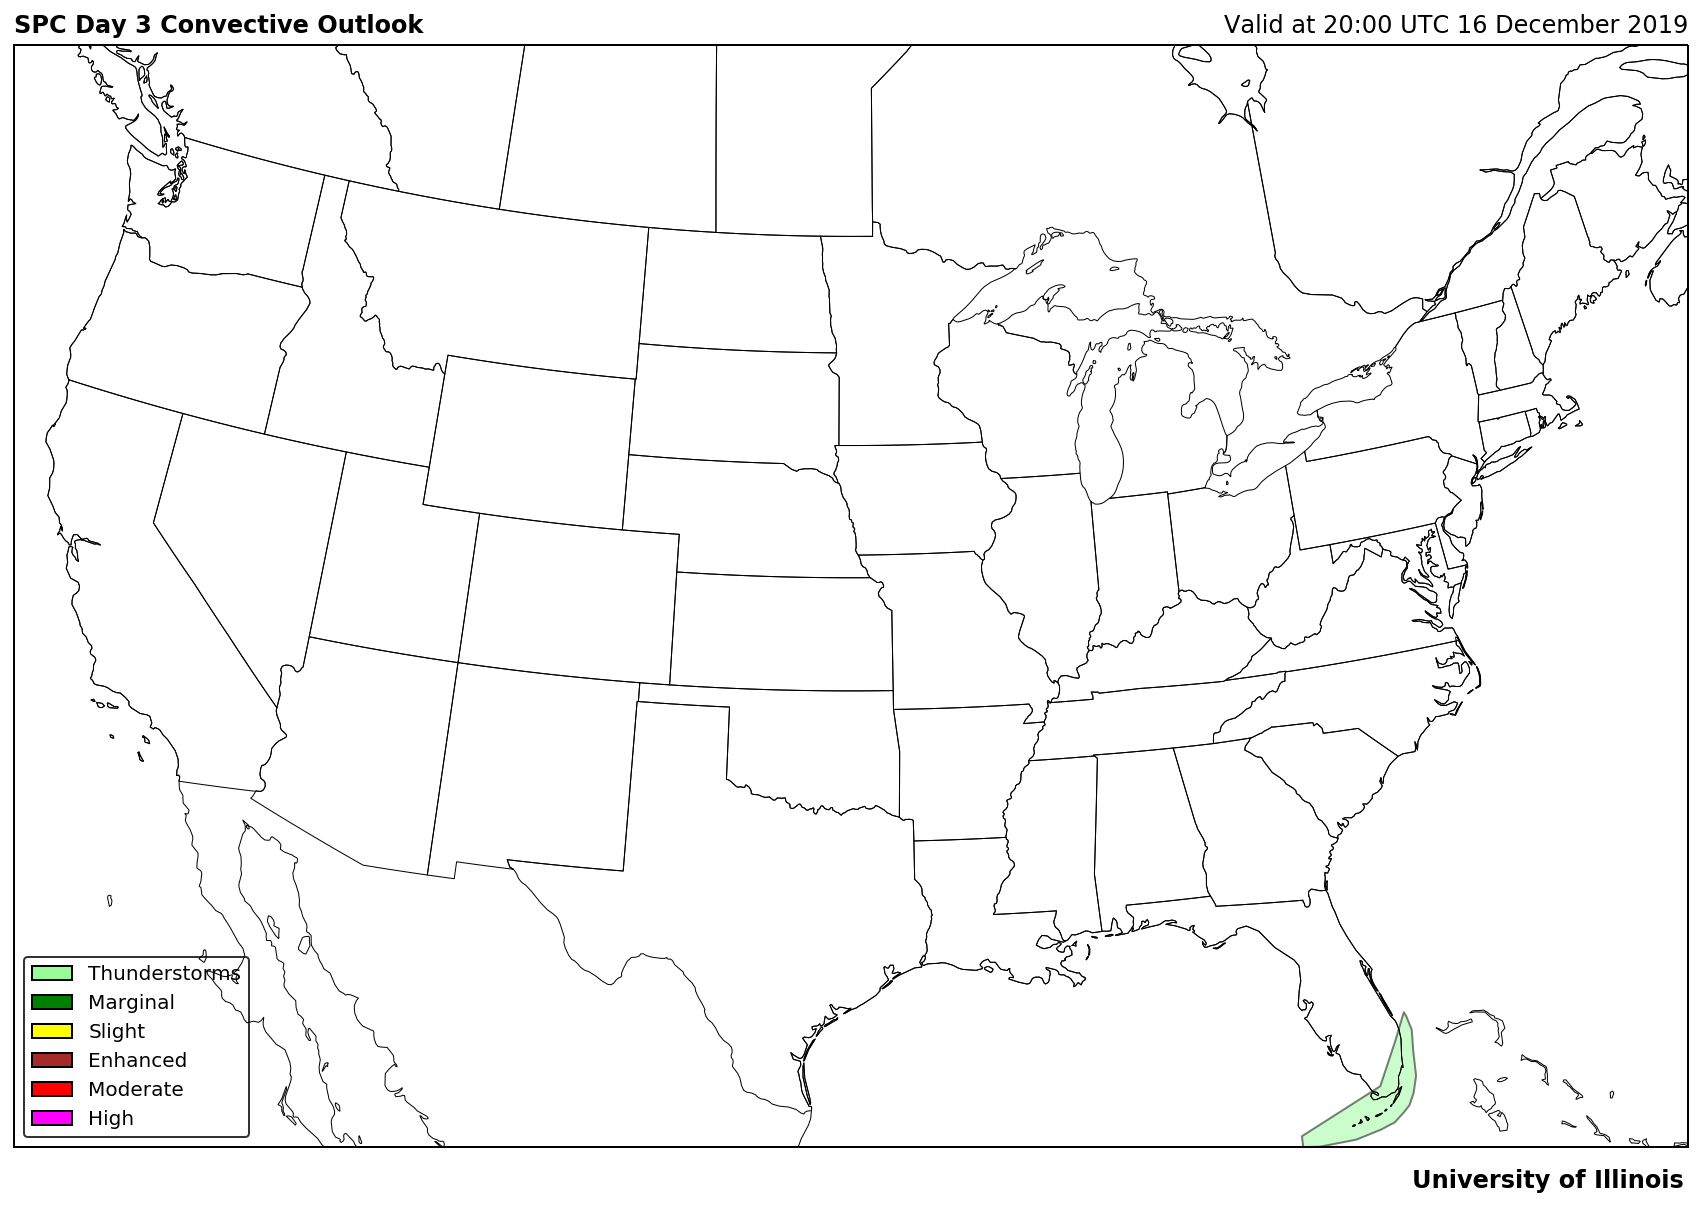

In [11]:
fig = plt.figure(figsize=(15, 12))

proj = ccrs.LambertConformal()
ax = fig.add_subplot(1, 1, 1, projection=proj)

extent = [-120, -72, 25, 52]
ax.set_extent(extent, crs=ccrs.PlateCarree())

ax.coastlines(resolution='50m', color='black', linewidth=0.5, zorder = 11)
states_provinces = cfeature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lakes', scale='50m', facecolor='none', zorder = 11)
ax.add_feature(states_provinces, edgecolor='black', linewidth=0.5)

plt.title('SPC Day 1 Convective Outlook', loc='left', fontweight='bold')
plt.title(datetime.strftime(time_valid, 'Valid at %H:%M UTC %d %B %Y'), loc='right')

for key in cat_plot_colors.keys():
    geometries = cat_gdf_day_1[cat_gdf_day_1['DN'] == key]
    if len(geometries) > 0:
        ax.add_geometries(geometries['geometry'], crs = ccrs.PlateCarree(), facecolor = cat_plot_colors[key], edgecolor = 'black', alpha = .5)

txt = 'University of Illinois'
plt.figtext(.835, 0.16, txt, wrap=True, horizontalalignment='center', fontsize=12, fontweight='bold')

legend_elements = [Patch(facecolor='palegreen', edgecolor='black', label='Thunderstorms'),
                   Patch(facecolor='Green', edgecolor='black', label='Marginal'),
                   Patch(facecolor='Yellow', edgecolor='black', label='Slight'),
                   Patch(facecolor='Brown', edgecolor='black', label='Enhanced'),
                   Patch(facecolor='Red', edgecolor='black', label='Moderate'),
                   Patch(facecolor='Magenta', edgecolor='black', label='High')]

legend = plt.legend(handles=legend_elements, loc=3, edgecolor = 'black')
frame = legend.get_frame()
frame.set_facecolor('white')

plt.show()


fig = plt.figure(figsize=(15, 12))

proj = ccrs.LambertConformal()
ax = fig.add_subplot(1, 1, 1, projection=proj)

extent = [-120, -72, 25, 52]
ax.set_extent(extent, crs=ccrs.PlateCarree())

ax.coastlines(resolution='50m', color='black', linewidth=0.5, zorder = 11)
states_provinces = cfeature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lakes', scale='50m', facecolor='none', zorder = 11)
ax.add_feature(states_provinces, edgecolor='black', linewidth=0.5)

plt.title('SPC Day 2 Convective Outlook', loc='left', fontweight='bold')
plt.title(datetime.strftime(time_valid, 'Valid at %H:%M UTC %d %B %Y'), loc='right')

for key in cat_plot_colors.keys():
    geometries = cat_gdf_day_2[cat_gdf_day_2['DN'] == key]
    if len(geometries) > 0:
        ax.add_geometries(geometries['geometry'], crs = ccrs.PlateCarree(), facecolor = cat_plot_colors[key], edgecolor = 'black', alpha = .5)

txt = 'University of Illinois'
plt.figtext(.835, 0.16, txt, wrap=True, horizontalalignment='center', fontsize=12, fontweight='bold')

legend_elements = [Patch(facecolor='palegreen', edgecolor='black', label='Thunderstorms'),
                   Patch(facecolor='Green', edgecolor='black', label='Marginal'),
                   Patch(facecolor='Yellow', edgecolor='black', label='Slight'),
                   Patch(facecolor='Brown', edgecolor='black', label='Enhanced'),
                   Patch(facecolor='Red', edgecolor='black', label='Moderate'),
                   Patch(facecolor='Magenta', edgecolor='black', label='High')]

legend = plt.legend(handles=legend_elements, loc=3, edgecolor = 'black')
frame = legend.get_frame()
frame.set_facecolor('white')

plt.show()


fig = plt.figure(figsize=(15, 12))

proj = ccrs.LambertConformal()
ax = fig.add_subplot(1, 1, 1, projection=proj)

extent = [-120, -72, 25, 52]
ax.set_extent(extent, crs=ccrs.PlateCarree())

ax.coastlines(resolution='50m', color='black', linewidth=0.5, zorder = 11)
states_provinces = cfeature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lakes', scale='50m', facecolor='none', zorder = 11)
ax.add_feature(states_provinces, edgecolor='black', linewidth=0.5)

plt.title('SPC Day 3 Convective Outlook', loc='left', fontweight='bold')
plt.title(datetime.strftime(time_valid, 'Valid at %H:%M UTC %d %B %Y'), loc='right')

for key in cat_plot_colors.keys():
    geometries = cat_gdf_day_3[cat_gdf_day_3['DN'] == key]
    if len(geometries) > 0:
        ax.add_geometries(geometries['geometry'], crs = ccrs.PlateCarree(), facecolor = cat_plot_colors[key], edgecolor = 'black', alpha = .5)

txt = 'University of Illinois'
plt.figtext(.835, 0.16, txt, wrap=True, horizontalalignment='center', fontsize=12, fontweight='bold')

legend_elements = [Patch(facecolor='palegreen', edgecolor='black', label='Thunderstorms'),
                   Patch(facecolor='Green', edgecolor='black', label='Marginal'),
                   Patch(facecolor='Yellow', edgecolor='black', label='Slight'),
                   Patch(facecolor='Brown', edgecolor='black', label='Enhanced'),
                   Patch(facecolor='Red', edgecolor='black', label='Moderate'),
                   Patch(facecolor='Magenta', edgecolor='black', label='High')]

legend = plt.legend(handles=legend_elements, loc=3, edgecolor = 'black')
frame = legend.get_frame()
frame.set_facecolor('white')

plt.show()

In [12]:
current_date_str = str(time_valid)[2:4] + str(time_valid)[5:7] +str(time_valid)[8:10]

wind_reports = pd.read_csv('https://www.spc.noaa.gov/climo/reports/' + current_date_str + '_rpts_wind.csv')

tor_reports = pd.read_csv('https://www.spc.noaa.gov/climo/reports/' + current_date_str + '_rpts_torn.csv')

hail_reports = pd.read_csv('https://www.spc.noaa.gov/climo/reports/' + current_date_str + '_rpts_hail.csv')

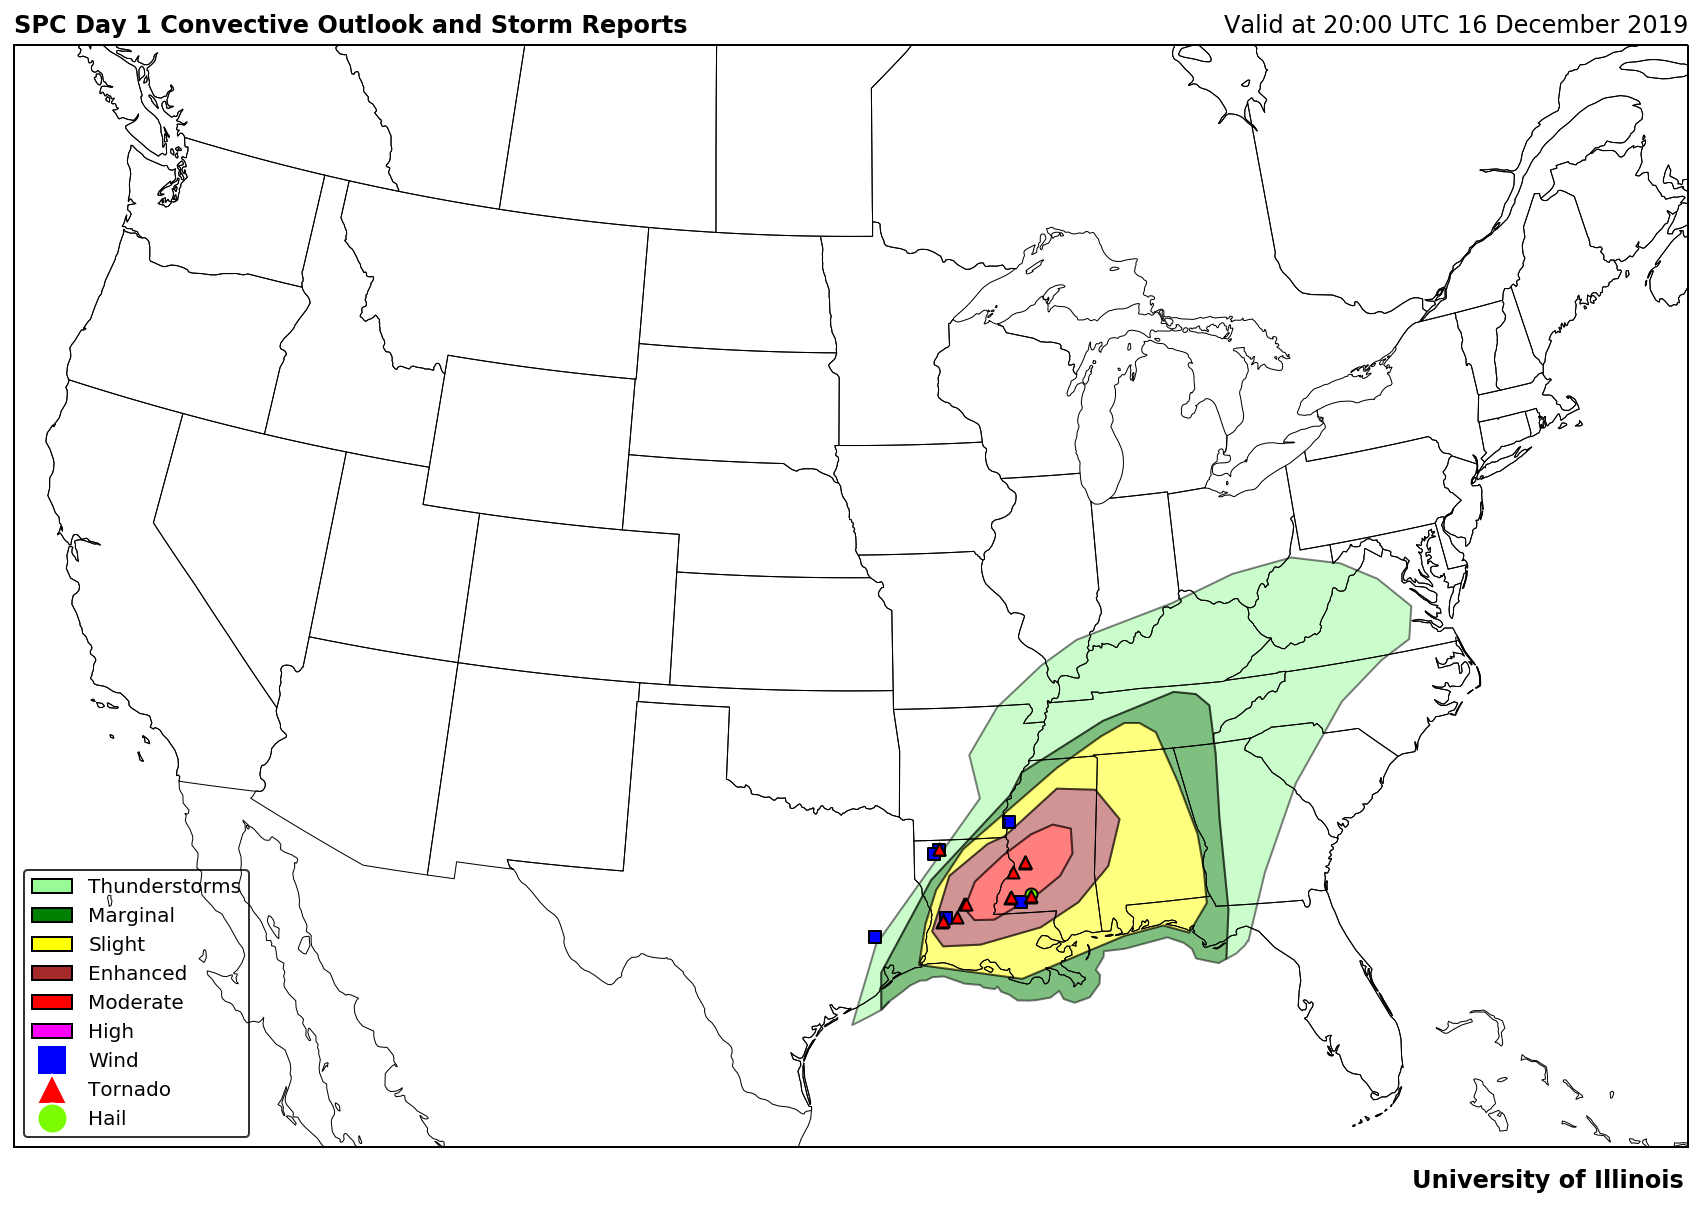

In [13]:
fig = plt.figure(figsize=(15, 12))

proj = ccrs.LambertConformal()
ax = fig.add_subplot(1, 1, 1, projection=proj)

extent = [-120, -72, 25, 52]
ax.set_extent(extent, crs=ccrs.PlateCarree())

ax.coastlines(resolution='50m', color='black', linewidth=0.5, zorder = 11)
states_provinces = cfeature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lakes', scale='50m', facecolor='none', zorder = 11)
ax.add_feature(states_provinces, edgecolor='black', linewidth=0.5)

plt.title('SPC Day 1 Convective Outlook and Storm Reports', loc='left', fontweight='bold')
plt.title(datetime.strftime(time_valid, 'Valid at %H:%M UTC %d %B %Y'), loc='right')

for key in cat_plot_colors.keys():
    geometries = cat_gdf_day_1[cat_gdf_day_1['DN'] == key]
    if len(geometries) > 0:
        ax.add_geometries(geometries['geometry'], crs = ccrs.PlateCarree(), facecolor = cat_plot_colors[key], edgecolor = 'black', alpha = .5)

txt = 'University of Illinois'
plt.figtext(.835, 0.16, txt, wrap=True, horizontalalignment='center', fontsize=12, fontweight='bold')

legend_elements = [Patch(facecolor='palegreen', edgecolor='black', label='Thunderstorms'),
                   Patch(facecolor='Green', edgecolor='black', label='Marginal'),
                   Patch(facecolor='Yellow', edgecolor='black', label='Slight'),
                   Patch(facecolor='Brown', edgecolor='black', label='Enhanced'),
                   Patch(facecolor='Red', edgecolor='black', label='Moderate'),
                   Patch(facecolor='Magenta', edgecolor='black', label='High'),
                   Line2D([0], [0], marker='s', markerfacecolor='blue', label='Wind', color = 'white', markersize=15),
                   Line2D([0], [0], marker='^', markerfacecolor='red', label='Tornado', color = 'white', markersize=15),
                   Line2D([0], [0], marker='o', markerfacecolor='lawngreen', label='Hail', color = 'white', markersize=15)]

legend = plt.legend(handles=legend_elements, loc=3, edgecolor = 'black')
frame = legend.get_frame()
frame.set_facecolor('white')

plt.scatter(wind_reports['Lon'], wind_reports['Lat'], transform = ccrs.PlateCarree(), marker = 's', c = 'blue', zorder = 10, edgecolors = 'black')
plt.scatter(tor_reports['Lon'], tor_reports['Lat'], marker='^', c='r', transform = ccrs.PlateCarree(), zorder = 12, edgecolors = 'black')
plt.scatter(hail_reports['Lon'], hail_reports['Lat'], marker='o', c='lawngreen', transform = ccrs.PlateCarree(), zorder = 11, edgecolors = 'black')

plt.show()